<!-- # Copyright (c) 2025 takotime808 -->

## Residual Grid Plots ##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.multioutput import MultiOutputRegressor

def plot_multioutput_residuals(y_true, y_pred, output_names=None, title="Residual Relationships Between Outputs"):
    """
    Plots a PairGrid of residuals for multi-output regression.
    
    Parameters
    ----------
    y_true : array-like, shape (n_samples, n_outputs)
        Ground truth target values.
    y_pred : array-like, shape (n_samples, n_outputs)
        Predicted values.
    output_names : list of str, optional
        Names for each output variable. If None, uses 'Output 1', 'Output 2', etc.
    title : str, optional
        Figure title.
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    residuals = y_true - y_pred
    n_outputs = residuals.shape[1]
    
    if output_names is None:
        output_names = [f"Output {i+1}" for i in range(n_outputs)]
    residual_names = [f"{name} Residual" for name in output_names]
    res_df = pd.DataFrame(residuals, columns=residual_names)
    
    sns.set(style='whitegrid')
    g = sns.PairGrid(res_df, diag_sharey=True)
    g.map_offdiag(sns.scatterplot, alpha=0.5)
    g.map_diag(sns.histplot, bins=20, kde=True)
    g.fig.suptitle(title, y=1.03, fontsize=16)
    plt.show()

# --- Example usage ---
# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=1, n_targets=3, noise=0.3, random_state=42)
for t in range(y.shape[1]):
    y[:, t] = np.sin(X[:, 0]*(t+1)) + 0.2*np.random.randn(len(X))

# Fit a MultiOutputRegressor (Gaussian Process)
gpr = GaussianProcessRegressor()
multi_gpr = MultiOutputRegressor(gpr)
multi_gpr.fit(X, y)

# Predict on train data
y_pred = multi_gpr.predict(X)


<!-- # Copyright (c) 2025 takotime808 -->

**Plot residuals using the function.**

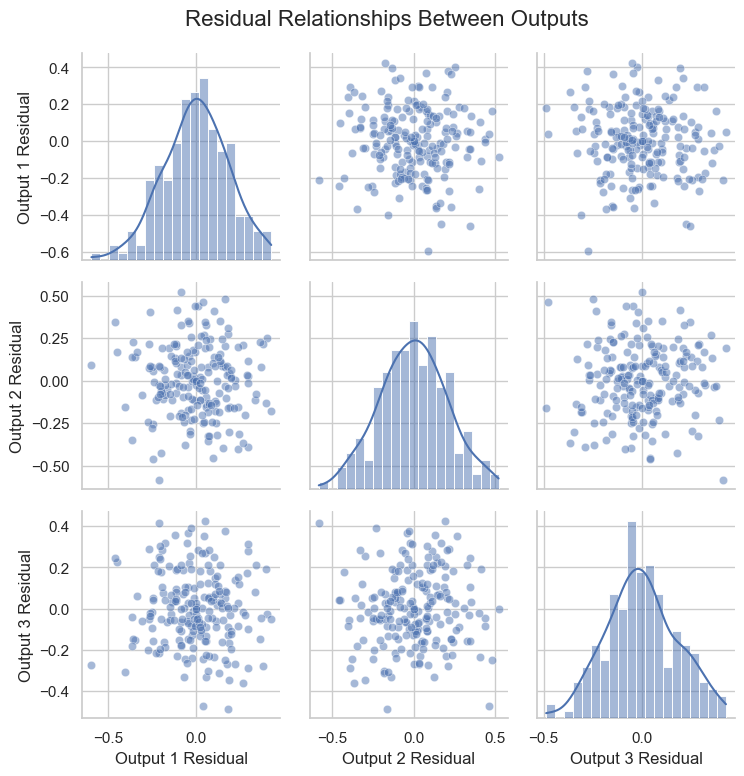

In [ ]:
plot_multioutput_residuals(y, y_pred)